In [ ]:
!pip install mlflow --quiet
get_ipython().system_raw("mlflow ui --port 5000 &")

     |████████████████████████████████| 17.0 MB 18.6 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 181 kB 52.9 MB/s 
     |████████████████████████████████| 146 kB 45.6 MB/s 
     |████████████████████████████████| 79 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 49.7 MB/s 
     |████████████████████████████████| 209 kB 49.8 MB/s 
     |████████████████████████████████| 78 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 1.1 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 


In [ ]:
!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('6wNJu5rVZrQ4pmP8NBBhW_4X5JwATLCSWL6N8nBwerJ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

     |████████████████████████████████| 745 kB 33.4 MB/s 
6wNJu5rVZrQ4pmP8NBBhW_4X5JwATLCSWL6N8nBwerJ··········
MLflow Tracking UI: https://5159-35-236-216-240.ngrok.io


In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
seed = 10 #Specify a seed value.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

current_run = mlflow.start_run()

#Logging the seed value to passed to the train_test_split function. 
mlflow.log_param("seed", seed)

estimators = int(input("Estimator(s): "))

#Model definition.
rclf = RandomForestClassifier(n_estimators = estimators)

mlflow.sklearn.autolog()
rclf.fit(X_train, y_train)
metrics = mlflow.sklearn.eval_and_log_metrics(rclf, X_test, y_test, prefix="val_")
mlflow.end_run()

Estimator(s): 4


Hello WOrld starting with experiment.

In [ ]:
import mlflow
import os
from random import random, randint
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

print("MLflow Version:", mlflow.version.VERSION)
print("Pandas Version:", pd.__version__)
print ("Scikit-learn Version:", sklearn.__version__)
print("Matplotlib Version:", matplotlib.__version__)

MLflow Version: 1.28.0
Pandas Version: 1.3.5
Scikit-learn Version: 1.0.2
Matplotlib Version: 3.2.2


In [ ]:
help(mlflow)

Help on package mlflow:

NAME
    mlflow

DESCRIPTION
    The ``mlflow`` module provides a high-level "fluent" API for starting and managing MLflow runs.
    For example:
    
    .. code:: python
    
        import mlflow
    
        mlflow.start_run()
        mlflow.log_param("my", "param")
        mlflow.log_metric("score", 100)
        mlflow.end_run()
    
    You can also use the context manager syntax like this:
    
    .. code:: python
    
        with mlflow.start_run() as run:
            mlflow.log_param("my", "param")
            mlflow.log_metric("score", 100)
    
    which automatically terminates the run at the end of the ``with`` block.
    
    The fluent tracking API is not currently threadsafe. Any concurrent callers to the tracking API must
    implement mutual exclusion manually.
    
    For a lower level API, see the :py:mod:`mlflow.client` module.

PACKAGE CONTENTS
    _spark_autologging
    artifacts (package)
    azure (package)
    azureml (package)
    

In [ ]:
def run(run_name=""):
    mlflow.set_experiment("helloWorld")
    
    with mlflow.start_run() as r:
        print("Running helloWorld.ipynb")
        print("Model run: ", r.info.run_uuid)
        mlflow.set_tag("mlflow.runName", run_name)
        mlflow.log_param("param1", randint(0, 100))

        mlflow.log_metric("foo", random())
        mlflow.log_metric("foo1", random() + 1)

        mlflow.set_tag("run_origin", "jupyter_notebook")

        if not os.path.exists("outputs"):
            os.makedirs("outputs")
        with open("outputs/test.txt", "w") as f:
            f.write("hello world!")

        mlflow.log_artifacts("outputs", artifact_path="artifact")

        mlflow.end_run()

In [ ]:
run()

2022/08/13 09:15:28 INFO mlflow.tracking.fluent: Experiment with name 'helloWorld' does not exist. Creating a new experiment.


Running helloWorld.ipynb
Model run:  49e65aff25d545f48a857a9a5d1bd38a


In [ ]:
run("colabrun")

Running helloWorld.ipynb
Model run:  613f4b567761498a977a422f685dd8a4


Regression Example:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import os

### Data Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [ ]:

# reading the dataset

df = pd.read_csv('auto-mpg.data', sep='\n', header=None)

df[[0, 'car_name']] = df[0].str.split('\t', expand=True)

df.head()


,0,car_name
0,18.0 8 307.0 130.0 3504. 12...,"""chevrolet chevelle malibu"""
1,15.0 8 350.0 165.0 3693. 11...,"""buick skylark 320"""
2,18.0 8 318.0 150.0 3436. 11...,"""plymouth satellite"""
3,16.0 8 304.0 150.0 3433. 12...,"""amc rebel sst"""
4,17.0 8 302.0 140.0 3449. 10...,"""ford torino"""


In [ ]:

# defining column names
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

# refining the dataframe
df[columns] = df[0].str.split(expand=True)
df.drop(columns=[0], inplace=True)
df['car_name'] = df['car_name'].apply(lambda x: x.replace('"', ''))

df.head()

,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436.,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433.,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449.,10.5,70,1


In [ ]:
# converting columns to float type
for col in df.columns:
    if col not in ['mpg', 'car_name']:
        df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
        df[col] = df[col].astype(float)

# seperating dependant and independant variables
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = df['mpg']

In [ ]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

In [ ]:
# function to evaluate model performance
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    return rmse, mae

Conventional Way for Model evaluation

In [ ]:
import numpy as np
alpha, l1_ratio = 0.01, 0.15
    
# initiating an elastic net model
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# fitting the model with train dataset
lr.fit(train_X, train_y)

# making predictions on test set
y_pred = lr.predict(test_X)

# obtaining the model performance
rmse, mae = eval_metrics(test_y, y_pred)

print('Hyperparameters: Alpha =  {}, L1 Ratio = {} \n'.format(alpha, l1_ratio))

print('Model Performance on test set: RMSE = {}, MAE = {} \n'.format(rmse, mae))

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2640850592427535, MAE = 2.442825267353496 



In [ ]:
alphas, l1_ratios = [0.01, 0.02, 0.5], [0.15, 0.2, 0.5]
    
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # initiating an elastic net model
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

        # fitting the model with train dataset
        lr.fit(train_X, train_y)

        # making predictions on test set
        y_pred = lr.predict(test_X)

        # obtaining the model performance
        rmse, mae = eval_metrics(test_y, y_pred)

        print('Hyperparameters: Alpha =  {}, L1 Ratio = {} \n'.format(alpha, l1_ratio))

        print('Model Performance on test set: RMSE = {}, MAE = {} \n'.format(rmse, mae))
        
        print ('-'*50,'\n')

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2640850592427535, MAE = 2.442825267353496 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.2 

Model Performance on test set: RMSE = 3.2641081943690287, MAE = 2.442779799335202 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.01, L1 Ratio = 0.5 

Model Performance on test set: RMSE = 3.264253936304378, MAE = 2.442505372857683 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.15 

Model Performance on test set: RMSE = 3.2682306618265717, MAE = 2.4462236246381988 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.2 

Model Performance on test set: RMSE = 3.268290119727705, MAE = 2.446143110178125 

-------------------------------------------------- 

Hyperparameters: Alpha =  0.02, L1 Ratio = 0.5 

Model Performance on

Track using MLFLow

In [ ]:
# defining a new experiment
experiment_name = 'PlainRegression'
# returns experiment ID
try:
    # creating a new experiment
    exp_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

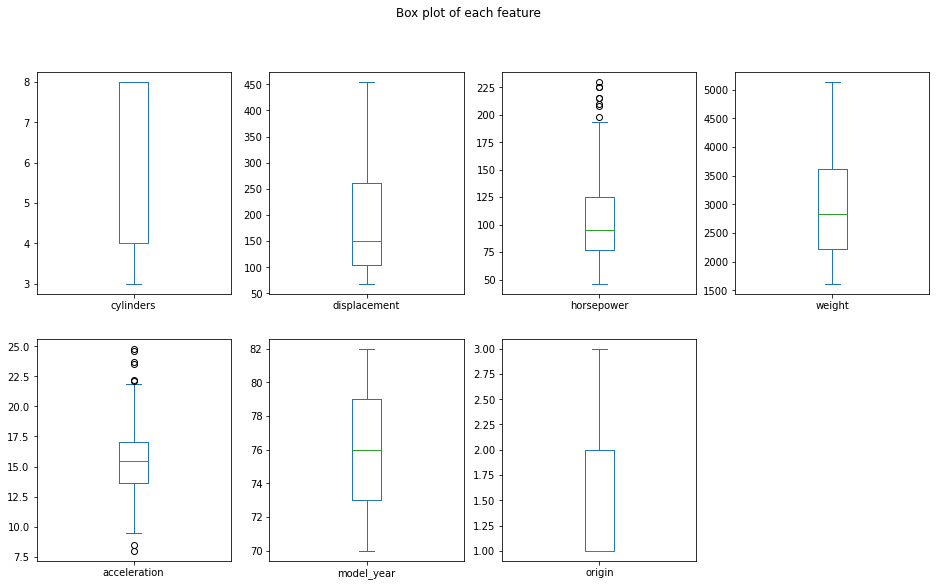

In [ ]:
if 'images' not in os.listdir():
    os.mkdir('images')

with mlflow.start_run(experiment_id=exp_id):
    
    # simulating EDA process by creating distribution plots for all the features
    train_X.plot(kind='box', subplots=True, layout=(2,4), figsize=(16,9), title='Box plot of each feature')
    
    # saving the image to images folder
    plt.savefig('images/distribution_plot_all_features.png')

    # logging artifacts -> saves the image and enables tracking for later use
    mlflow.log_artifacts('images')
    
    # defining alpha and l1 ratio
    alpha, l1_ratio = 0.02, 0.15
    
    # initiating an elastic net model
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

    # fitting the model with train dataset
    lr.fit(train_X, train_y)

    # making predictions on test set
    y_pred = lr.predict(test_X)

    # obtaining the model performance
    rmse, mae = eval_metrics(test_y, y_pred)
    
    # logging the parameters 
    mlflow.log_param('alpha', alpha)
    mlflow.log_param('l1_ratio', l1_ratio)
    
    # logging the metrics
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('mae', mae)
    
    # saving the model for later use
    mlflow.sklearn.log_model(lr, "PlainRegression_Model")
    

Hyper Parametr Tuning using MLFlow

In [ ]:
# defining a new experiment
experiment_name = 'PlainRegression_HyperParameter_Search'
# returns experiment ID
try:
    # creating a new experiment
    exp_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [ ]:
# defining alpha and l1 ratio
alphas, l1_ratios = [0.01, 0.05, 0.1, 0.02, 0.03], [0.15, 0.1, 0.2, 0.25]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        # starting an mlflow run, and tracking them under the experiment defined above
        with mlflow.start_run(experiment_id=exp_id):

            # logging artifacts -> saves the image and enables tracking for later use
            mlflow.log_artifacts('images')

            # initiating an elastic net model
            lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

            # fitting the model with train dataset
            lr.fit(train_X, train_y)

            # making predictions on test set
            y_pred = lr.predict(test_X)

            # obtaining the model performance
            rmse, mae = eval_metrics(test_y, y_pred)

            # logging hyperparameters defined above
            mlflow.log_param("alpha", alpha)
            mlflow.log_param("l1_ratio", l1_ratio)

            # logging performance of the model
            mlflow.log_metric("rmse", rmse)
            mlflow.log_metric("mae", mae)
    

Classification example 

In [ ]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os


Data source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [ ]:
# reading the dataset
df = pd.read_csv('car.data', sep='\n', header=None)

# # defining column names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']

# # refining the dataframe
df[columns] = df[0].str.split(',', expand=True)
df.drop(columns=[0], inplace=True)

df.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# seperating dependant and independant variables

X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df['evaluation']

In [ ]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

In [ ]:
# defining a new experiment
experiment_name = 'SimpleClassification'
# returns experiment ID
try:
    # creating a new experiment
    exp_id = mlflow.create_experiment(name=experiment_name)
except Exception as e:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [ ]:
if 'data_processed' not in os.listdir():
    os.mkdir('data_processed')

# starting an mlflow run, and tracking them under the experiment defined above
with mlflow.start_run(experiment_id=exp_id, run_name='First_Classification_Model'):
    
    # adding tags to the run
    mlflow.set_tag('Description','Simple Classification Model')
    mlflow.set_tags({'ProblemType': 'Classification', 'ModelType': 'DecisionTree', 'ModelLibrary': 'Scikit-Learn'})
    
    # using one hot encoder to encode the categories
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    X_encoded_train = encoder.fit_transform(train_X)
    train_x_encoded = pd.DataFrame(X_encoded_train.toarray())
    
    X_encoded_test = encoder.transform(test_X)
    test_x_encoded = pd.DataFrame(X_encoded_test.toarray())
    
    # saving a copy of the encoded data
    train_x_encoded.to_csv('data_processed/encoded_train.csv', sep='|', index=False)
    test_x_encoded.to_csv('data_processed/encoded_test.csv', sep='|', index=False)
    
    # logging artifacts -> saves the copy of the data and enables tracking for later use
    mlflow.log_artifacts('data_processed')
    
    # defining alpha and l1 ratio
    max_depth, max_features = 5, 15
    
    # initiating an decision tree model
    clf = DecisionTreeClassifier(random_state=0, max_depth=5, max_features=19)
    
    # fitting the model with train dataset
    clf.fit(train_x_encoded, train_y)
    
    # logging explaination of the model
    # mlflow.shap.log_explanation(clf.predict_proba, train_x_encoded)
    
    # making predictions on test set
    clf.predict(test_x_encoded)

    # obtaining the model performance
    accuracy = clf.score(test_x_encoded, test_y)
    
    # logging hyperparameters defined above
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("max_features", max_features)
    
    # logging performance of the model
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.sklearn.log_model(clf, 'SimpleClassification_Model')
    

In [ ]:
clf.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

#Searching Runs using code 


In [ ]:
# the search_runs method by default returns a dataframe of of the runs executed under a particular experiment ID
mlflow.search_runs(['0'])

,run_id,experiment_id,status,artifact_uri,start_time,end_time


In [ ]:
# these runs can be queried by passing in an additional parameter

search_query = 'metrics.rmse < 3.27 and metrics.mae < 2.45'
mlflow.search_runs(['0'], search_query)

,run_id,experiment_id,status,artifact_uri,start_time,end_time


In [ ]:
print ('Run IDs with least MAE are: \n')

for run in df['run_id'][df['metrics.mae']==df['metrics.mae'].min()].values:
    print(run, end=', ' )

Run IDs with least MAE are: 



KeyError: ignored

In [ ]:
# the output can be read as a dataframe, which can be used for further analysis

search_query = 'metrics.rmse < 3.27 and metrics.mae < 2.45'
df = mlflow.search_runs(['0'], search_query)
df.head()

#Getting details of the Run

In [ ]:
client = mlflow.tracking.MlflowClient()

In [ ]:
client.get_run('6872d876df034cd0b0b690fdbeb2d427')

MlflowException: ignored

## Serving the model

In [ ]:
# filling in the required details

!mlflow models serve --model-uri mlruns/0/6872d876df034cd0b0b690fdbeb2d427/artifacts/PlainRegression_Model -p 5600

Traceback (most recent call last):
  File "/usr/local/bin/mlflow", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/mlflow/models/cli.py", line 69, in serve
    model_uri, env_manager=env_m

CURL Command to post requests
curl http://127.0.0.1:{port_number}/invocations -H 'Content-Type: application/json' -d '{ "columns": ['col1', 'col2', 'col3', 'col4', 'col5'], "data": [[x1, x2, x3, x4, x5], [b1, b2, b3, b4, b5]] }'

In [ ]:
!curl http://127.0.0.1:5600/invocations -H 'Content-Type: application/json' -d '{ "columns": ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"], "data": [[8, 350.0, 165.0, 3693.0, 11.5, 70, 1]] }'

#Directly running some other code from Gith Hub - with no setup and extra effort.

In [ ]:
# using ml projects and tracking the runs as a new experiment

# use set experiment method to either create a new experiment or set it as the experiment to record runs
mlflow.set_experiment('ProjectsFileExample')

2022/08/13 09:44:56 INFO mlflow.tracking.fluent: Experiment with name 'ProjectsFileExample' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/5', experiment_id='5', lifecycle_stage='active', name='ProjectsFileExample', tags={}>

In [ ]:
project_uri = "https://github.com/mlflow/mlflow-example"
params = {"alpha": 0.5, "l1_ratio": 0.01}

# Run MLflow project and create a reproducible conda environment
# on a local host
mlflow.run(project_uri, parameters=params) 

2022/08/13 09:46:18 INFO mlflow.projects.utils: === Fetching project from https://github.com/mlflow/mlflow-example into /tmp/tmpor9k34i2 ===
2022/08/13 09:46:18 INFO mlflow.projects.utils: Fetched 'master' branch


ExecutionException: ignored

In [ ]:
project_uri = "https://github.com/mlflow/mlflow-example"
params = {"alpha": 0.2, "l1_ratio": 0.01}

# running again with different parameters
mlflow.run(project_uri, parameters=params, experiment_name='ProjectsFileExample')